# Полезные библиотеки для python

## Pandas

Pandas - открытая библиотека, предоставляющая высокпроизводительные удобные инструменты для работы с данными. Библиотека поставляется в стандартном наборе дистрибутива anaconda. <a href='https://pandas.pydata.org/docs/index.html'>Ссылка на документацию</a>. 

Для использования `Pandas` импортируется в код обычным методом. По общей договоренности чаще всего его импортируют как `pd`.

<a href='theme10.html'>Чуть более подробное описание библиотеки</a>

In [1]:
import pandas as pd

### Один пример работы Pandas. Загрузка экспериментальных данных 

Для загрузки экспериментальных данных из текстовых файлов используется функция `pd.read_table(filename)`


В нашем примере мы создадим функцию `importer` с аргументами `folder` (папка с экспериментальными данными) и `undent` (число, показывающее сколько символов с конца необходимо убрать из имени файла, чтобы получить число; в дальнейшем это будет использоваться для задания ключей). 


In [2]:
def importer(folder, undent):    
    items = os.listdir(folder)#Считываем имена файлов в папке
    data = pd.DataFrame()#Создаем пустой DataFrame
    
    for names in items: #Инициируем главный цикл перебора всех имен в искомой папке
        
        if names.endswith(".txt"):#Выбираем только файлы с расширением txt. 
            
            #Загружаем данные из файлов текстовых файлов
            table=pd.read_table(folder +'/' + names, # имя файла
                                sep='\s+', #разделитель строк в исходном файле
                                skiprows=[0],#количество или номера строк, которые не следует считывать 
                                names=['wavelenght'+names[:-undent],int(names[:-undent])], #названия колонок, которые следует использовать при чтении из файла
                                index_col=0)#колонка, которая будет использоваться в качестве индекса. Если не задавать - будут присвоены индексы по умолчанию, и датафрейм будет двумерным
            #Собираем все экспериментальные в один датафрейм data с помощью конкатенации массивов data и table.
            #В отличие от numpy при конкатенации dataframe нулевой размерности и непустого не возникает ошибок
            #несовпадения размерности, что значитльно упрощает жизнь. Кроме этого, как было указано раньше,
            #при несовпадении размерностей файлов, пустые ячейки будут заполнены NaN, после чего их можно будет убрать, например взяв срез
            data = pd.concat([data,table], 
                             axis=1)#ключ, указывающий на поколоночную конкатенацию  
    return data.reindex(sorted(data.columns), axis=1)

На следующем этапе воспользуемся созданной нами функцией importer. 

<a href='theme10.zip'>используемые файлы</a>

In [5]:
import os
folder="theme10/"#задаем название папки с экспериментальными данными
undent = 7 #количесвто ненужных символов в конце названия
data = importer(folder,undent) #задаем переменной data значения функции importer c аргументами folder и udent
print(data)

        -2     -1      0      10     20     30     40     50     60     70   \
700.0  0.010  0.010  0.012  0.001  0.002  0.005  0.001  0.002  0.002  0.002   
699.0  0.010  0.010  0.012  0.001  0.002  0.005  0.001  0.002  0.002  0.002   
698.0  0.010  0.010  0.012  0.001  0.002  0.005  0.001  0.002  0.002  0.002   
697.0  0.009  0.010  0.012  0.001  0.002  0.004  0.001  0.002  0.001  0.002   
696.0  0.009  0.010  0.012  0.001  0.002  0.005  0.001  0.002  0.001  0.002   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
204.0  0.147  0.127  0.108 -0.013  0.006  0.036  0.012  0.085  0.045  0.002   
203.0  0.240  0.068  0.072  0.005  0.025  0.062  0.039  0.036  0.084  0.017   
202.0  0.121  0.017 -0.009 -0.025 -0.064  0.008 -0.005  0.024  0.036 -0.011   
201.0  0.077  0.115  0.059 -0.030  0.004  0.049 -0.002 -0.028  0.014 -0.042   
200.0  0.087  0.125  0.027 -0.032 -0.050  0.067  0.035  0.061  0.025 -0.021   

         80     90     100    110    120    130    

Построим сперва график одной экспериментальной кривой на первом графике, а затем на втором - всех экспериментальных данных.

<AxesSubplot:>

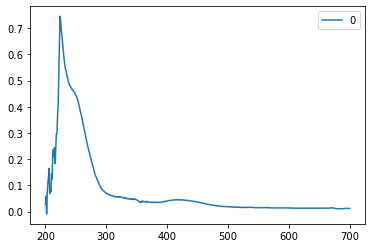

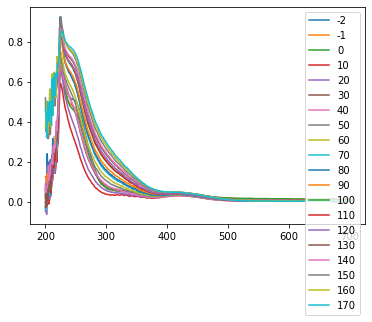

In [15]:
data[{0}].plot()
data.plot() 

Теперь вычтем исходны спектр из остальных, и построим изменение сигнала на 300 нм от времени

<AxesSubplot:>

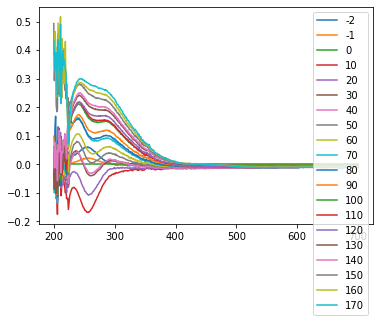

In [16]:
first_col=data[{0}]

bigtable_sub=data.apply(lambda column: column - first_col[0],  
                        #column взято для удобства, можно писать любое название
                        #first_col[0] необходимо повторно указать название колонки,
                        #потому что pandas требует это делать при применении оперпций к колонкам
                        axis=0)# ключ указывает, что опреацию будем применять поколоночно

bigtable_sub.plot()


Text(0, 0.5, 'Absorption')

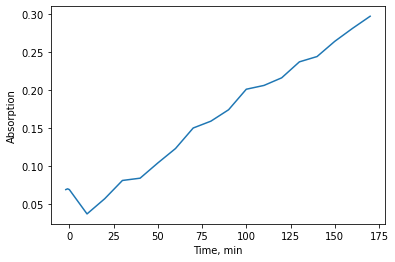

In [14]:
data300 = data.loc[300]
ax=data300.plot()
ax.set_xlabel("Time, min") #название оси x
ax.set_ylabel("Absorption")   #название оси y

## Seaborn

Seaborn - библиотека для визуализации основаная на `matplotlib`. Основным направлением библиотеки является работа со статистическими данными.

<a href='https://seaborn.pydata.org/index.html'>Документация Seaborn</a>

Расмотрим пример распределения глубины клюва пингвинов в зависимости от массы тела

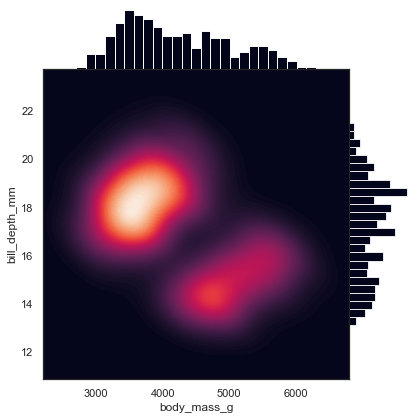

In [22]:
import seaborn as sns
sns.set_theme(style="white")

df = sns.load_dataset("penguins")
#print(type(df),'\n\n',df)

g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

## RDKit

RDKit - мощный дистрибутив для хемоинформатики. Заточен для анализа структур молекул. Требует установки дистрибутива.

<a href='https://www.rdkit.org/'>Сайт проекта</a>

In [28]:
from rdkit import Chem

чтение данных может происходить из различных форматов:

In [29]:
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')
#mol = Chem.MolFromMolFile('data/input.mol')
#stringWithMolData=open('data/input.mol','r').read()
#mol = Chem.MolFromMolBlock(stringWithMolData)

Удобен для отрисовки молекул и визуализации данных.

In [44]:
#from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
IPythonConsole.molSize = 400,200
IPythonConsole.drawOptions.addStereoAnnotation = False

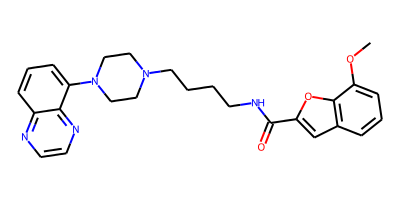

In [45]:
mol

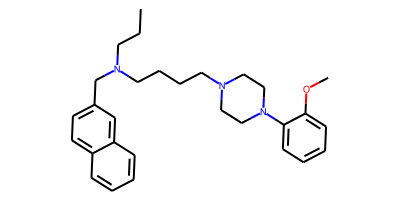

In [46]:
refmol

In [47]:
from rdkit.Chem.Draw import SimilarityMaps

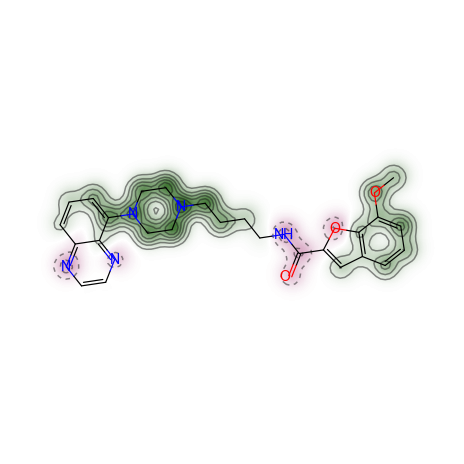

In [48]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)

## SymPy

Пакет для символьных вычислений.

<a href='https://www.sympy.org/en/index.html'>Документация</a>

In [52]:
import sympy
from sympy import init_printing, symbols
init_printing(use_unicode=True)
x, y = symbols('x y')
expr = (x + y)**2
expr

In [54]:
from sympy import expand, factor
expanded_expr = expand(expr)
expanded_expr

In [55]:
factor(expanded_expr-x**2)

In [57]:
from sympy import integrate, exp,cos,sin
integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

## scikit-learn

Библиотека для машинного обучения. <a href='https://scikit-learn.org/'>Сайт проекта</a>. Собрана на основе NumPy, SciPy, matplolib

## svgwrite

Библиотека для отрисовки svg. <a href='https://svgwrite.readthedocs.io/en/latest/'>Документация</a>.

## MDTraj

Библиотека для работы с траекториями молекулярной динамики. <a href='https://www.mdtraj.org/'>Сайт проекта</a>.

## python-docx

Библиотека для работы с docx файлами. <a href='https://python-docx.readthedocs.io/en/latest/#'>Документация</a>.

(c Excel лучше работать с помощью Pandas)

## SPHINX

Генератор документации (например эта страница сделана с его помощью). <a href='https://www.sphinx-doc.org/en/master/'>Документация</a>.
